<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 136.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 159.8 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 140.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 153.0 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.columns.to_list()


--2025-11-05 15:27:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  54.2MB/s    in 2.8s    

2025-11-05 15:27:32 (54.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



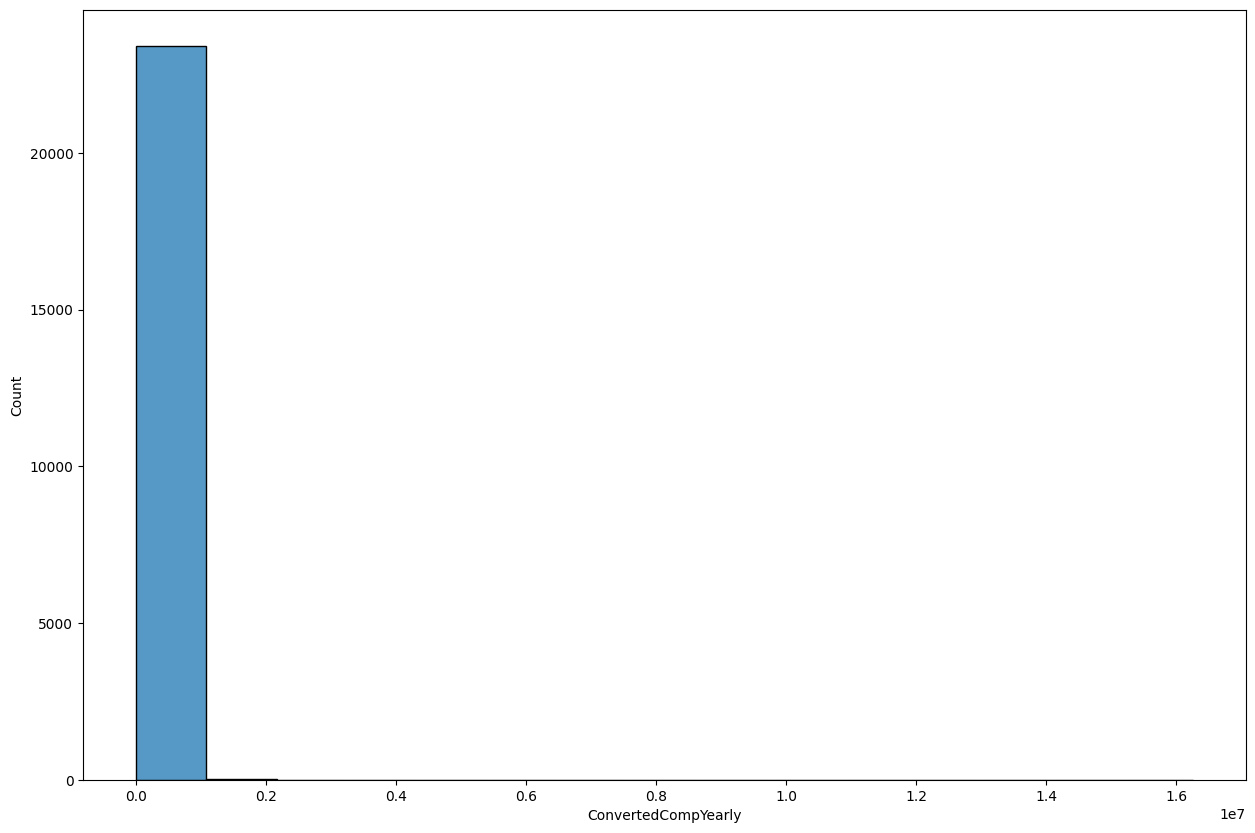

In [4]:
## Write your code here
import seaborn as sns
df=df.dropna(subset=['ConvertedCompYearly'])

capvalue = df['ConvertedCompYearly'].quantile(0.95)

plt.figure(figsize=(15,10))
sns.histplot(data=df[df['ConvertedCompYearly']< capvalue], x=df['ConvertedCompYearly'], bins= 15, edgecolor='black')
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



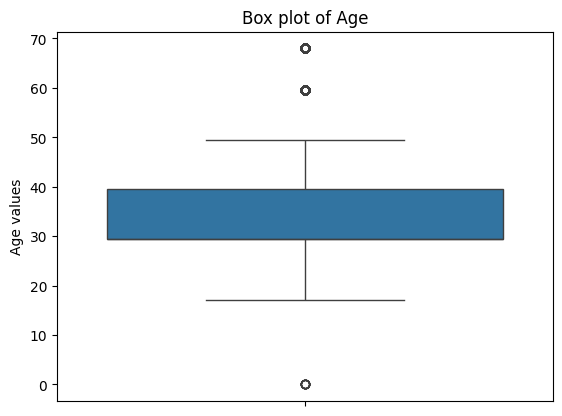

In [5]:
## Write your code here
df=df.dropna(subset=['Age'])

age_mapping={ '25-34 years old': 29.5,
             '35-44 years old': 39.5,
             '18-24 years old': 21,
             '45-54 years old': 49.5,
             '55-64 years old': 59.5,
             '65 years or older' : 68,
             'Under 18 years old': 17,
             'Prefer not to say': 0}

df['age_numeric']= df['Age'].map(age_mapping)
df['age_numeric']= pd.to_numeric(df['age_numeric'],errors='coerce')

sns.boxplot(data=df, y='age_numeric')
plt.title('Box plot of Age')
plt.ylabel('Age values')
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



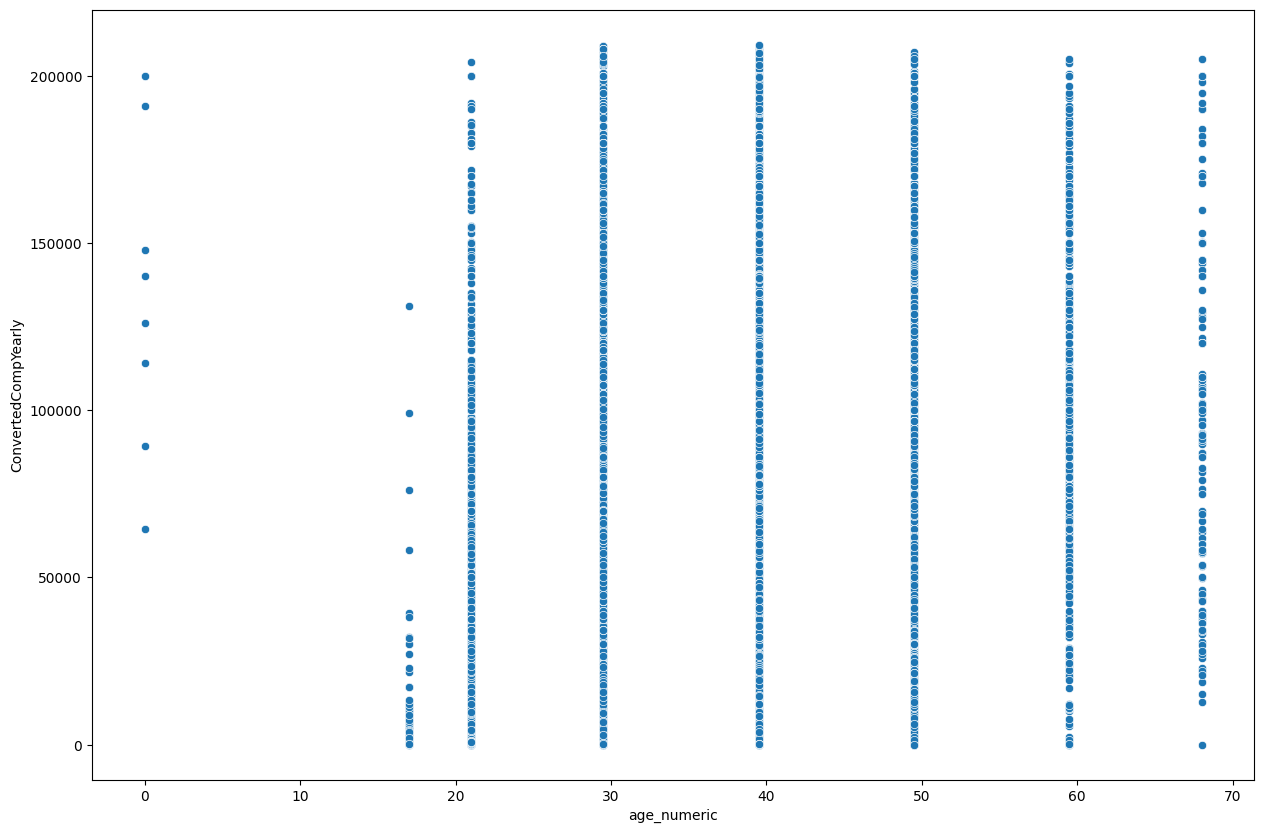

In [6]:
## Write your code here

plt.figure(figsize=(15,10))
sns.scatterplot(data=df[df['ConvertedCompYearly']< capvalue], x='age_numeric', y='ConvertedCompYearly')
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


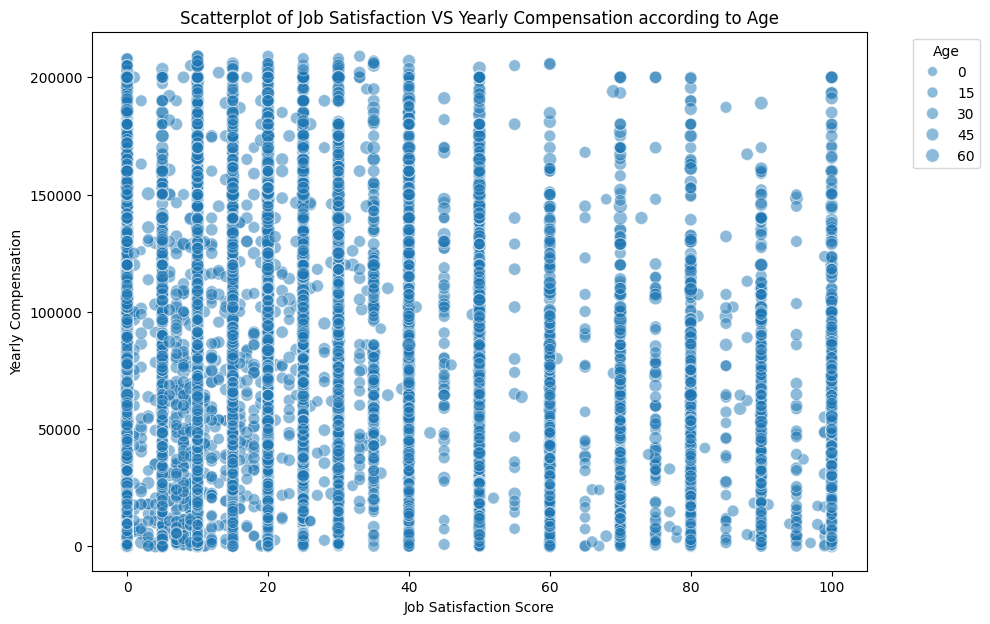

In [7]:
## Write your code here
df=df.dropna(subset=['JobSatPoints_6', 'ConvertedCompYearly', 'age_numeric'])

plt.figure(figsize=(10,7))
sns.scatterplot(data=df[df['ConvertedCompYearly']<capvalue], x='JobSatPoints_6',y='ConvertedCompYearly' , size='age_numeric', alpha=0.5, sizes=(50,100))
plt.legend(bbox_to_anchor=(1.05,1),title='Age')
plt.title('Scatterplot of Job Satisfaction VS Yearly Compensation according to Age')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation')
plt.show()




### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



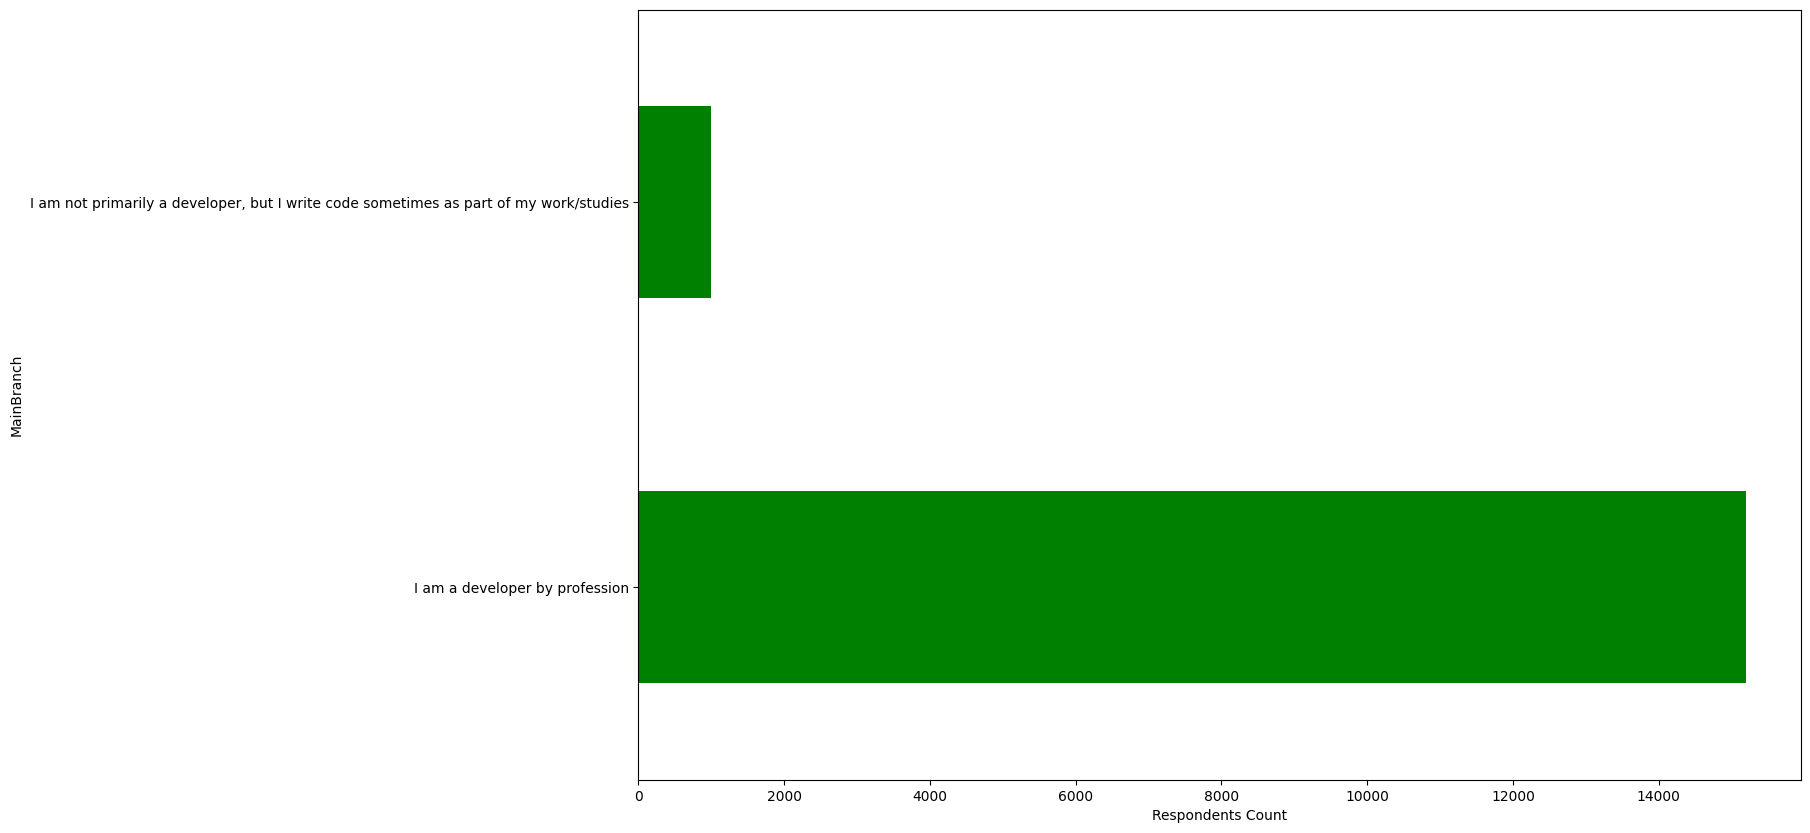

In [8]:
## Write your code here
df=df.dropna(subset=['MainBranch'])
bar =df['MainBranch'].value_counts()


bar.plot(kind='barh', color='g', figsize=(15,10))
plt.xlabel('Respondents Count')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



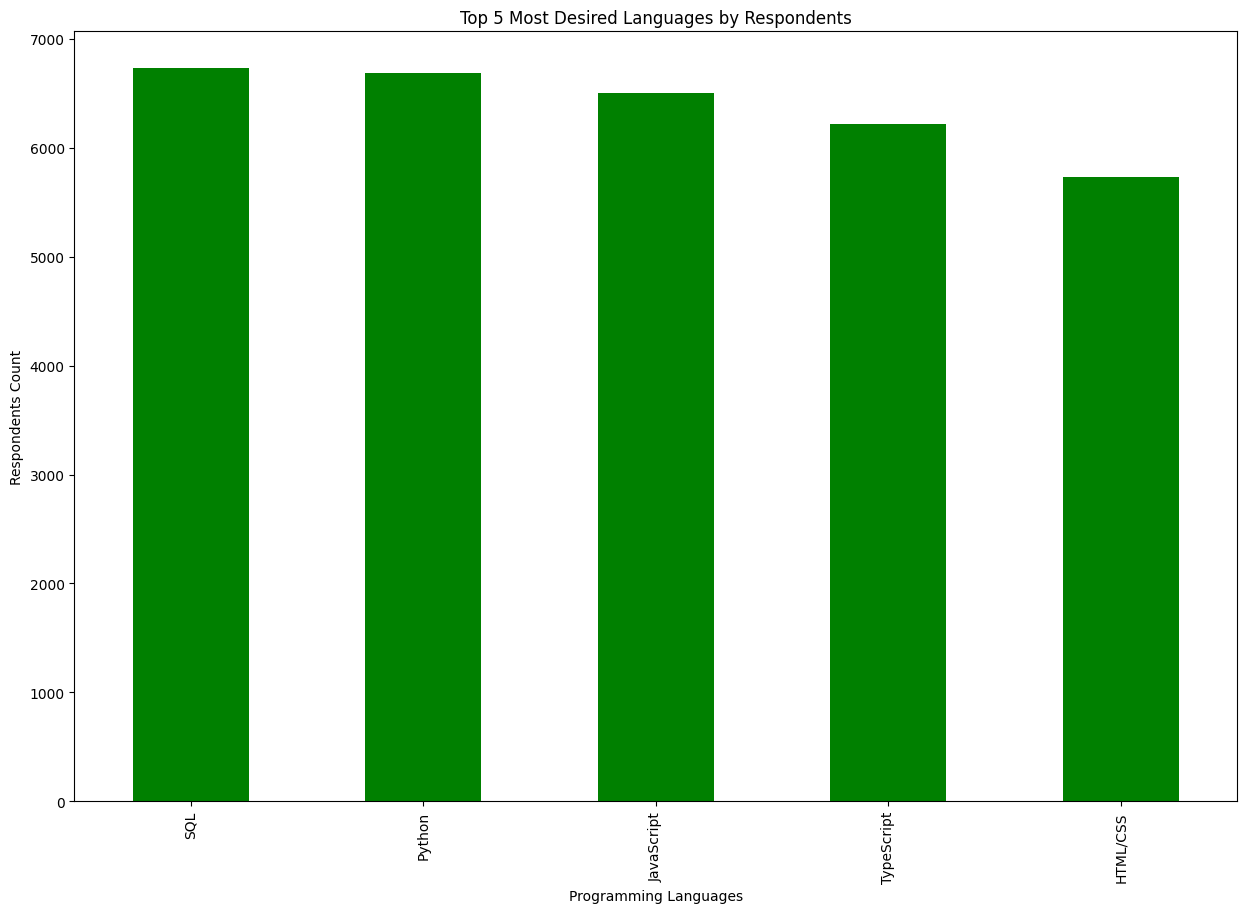

In [9]:
## Write your code here

df=df.dropna(subset=['LanguageWantToWorkWith'])

df_expanded = df.assign(lang = df['LanguageWantToWorkWith'].str.split(';')).explode('lang')
df_expanded['lang'] = df_expanded['lang'].str.strip()
top5lang = df_expanded['lang'].value_counts().head(5)
top5lang.plot(kind='bar', color='g', figsize=(15,10))
plt.title('Top 5 Most Desired Languages by Respondents')
plt.ylabel('Respondents Count')
plt.xlabel('Programming Languages')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


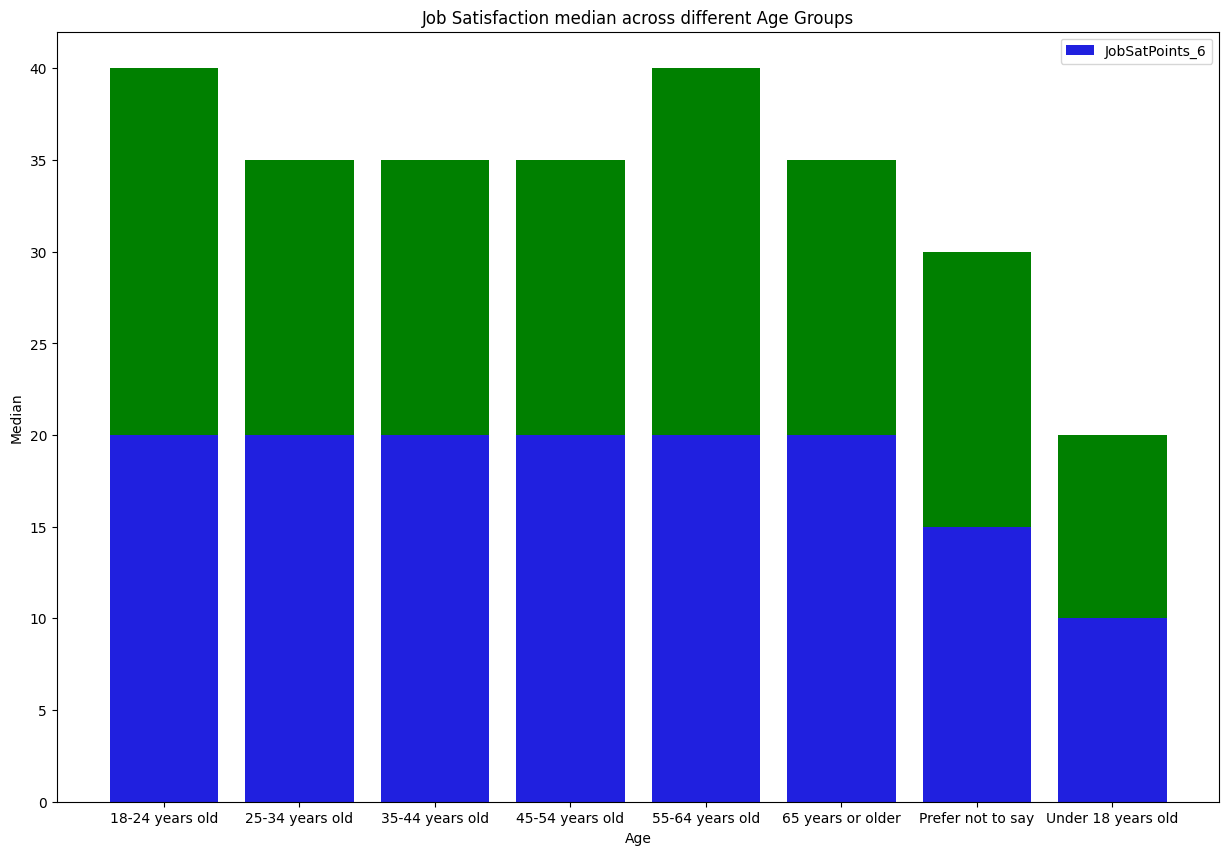

In [10]:
## Write your code here

df=df.dropna(subset=['Age', 'JobSatPoints_6','JobSatPoints_7'])

df1= df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].agg('median').reset_index()

plt.figure(figsize=(15,10))
sns.barplot(data=df1, x='Age' ,y='JobSatPoints_6', label = 'JobSatPoints_6', color='b')
plt.bar(df1['Age'], df1['JobSatPoints_7'], bottom=df1['JobSatPoints_6'], label= 'JobSatPoints_7', color='g')
plt.title('Job Satisfaction median across different Age Groups')
plt.ylabel('Median')
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



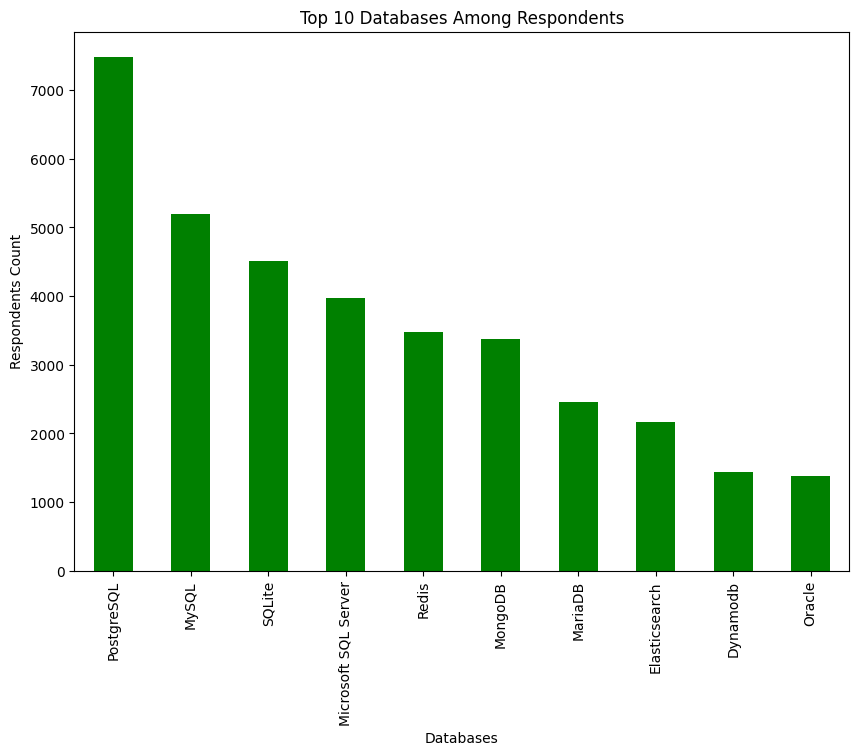

In [11]:
## Write your code here

df=df.dropna(subset=['DatabaseHaveWorkedWith'])

df_expanded = df.assign(databases = df['DatabaseHaveWorkedWith'].str.split(';')).explode('databases')
df_expanded['databases'] = df_expanded['databases'].str.strip()
top10 = df_expanded['databases'].value_counts().head(10)

top10.plot(kind='bar', figsize=(10,7), color='g')
plt.title('Top 10 Databases Among Respondents')
plt.xlabel('Databases')
plt.ylabel('Respondents Count')
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



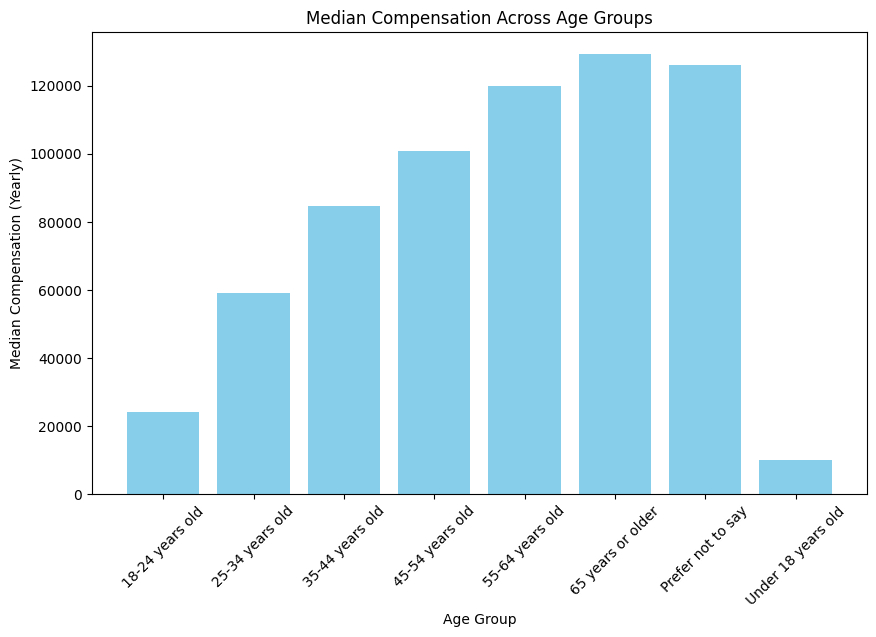

In [12]:
## Write your code here


median_comp = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

plt.figure(figsize=(10,6))
plt.bar(median_comp['Age'], median_comp['ConvertedCompYearly'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (Yearly)')
plt.title('Median Compensation Across Age Groups')
plt.xticks(rotation=45)
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



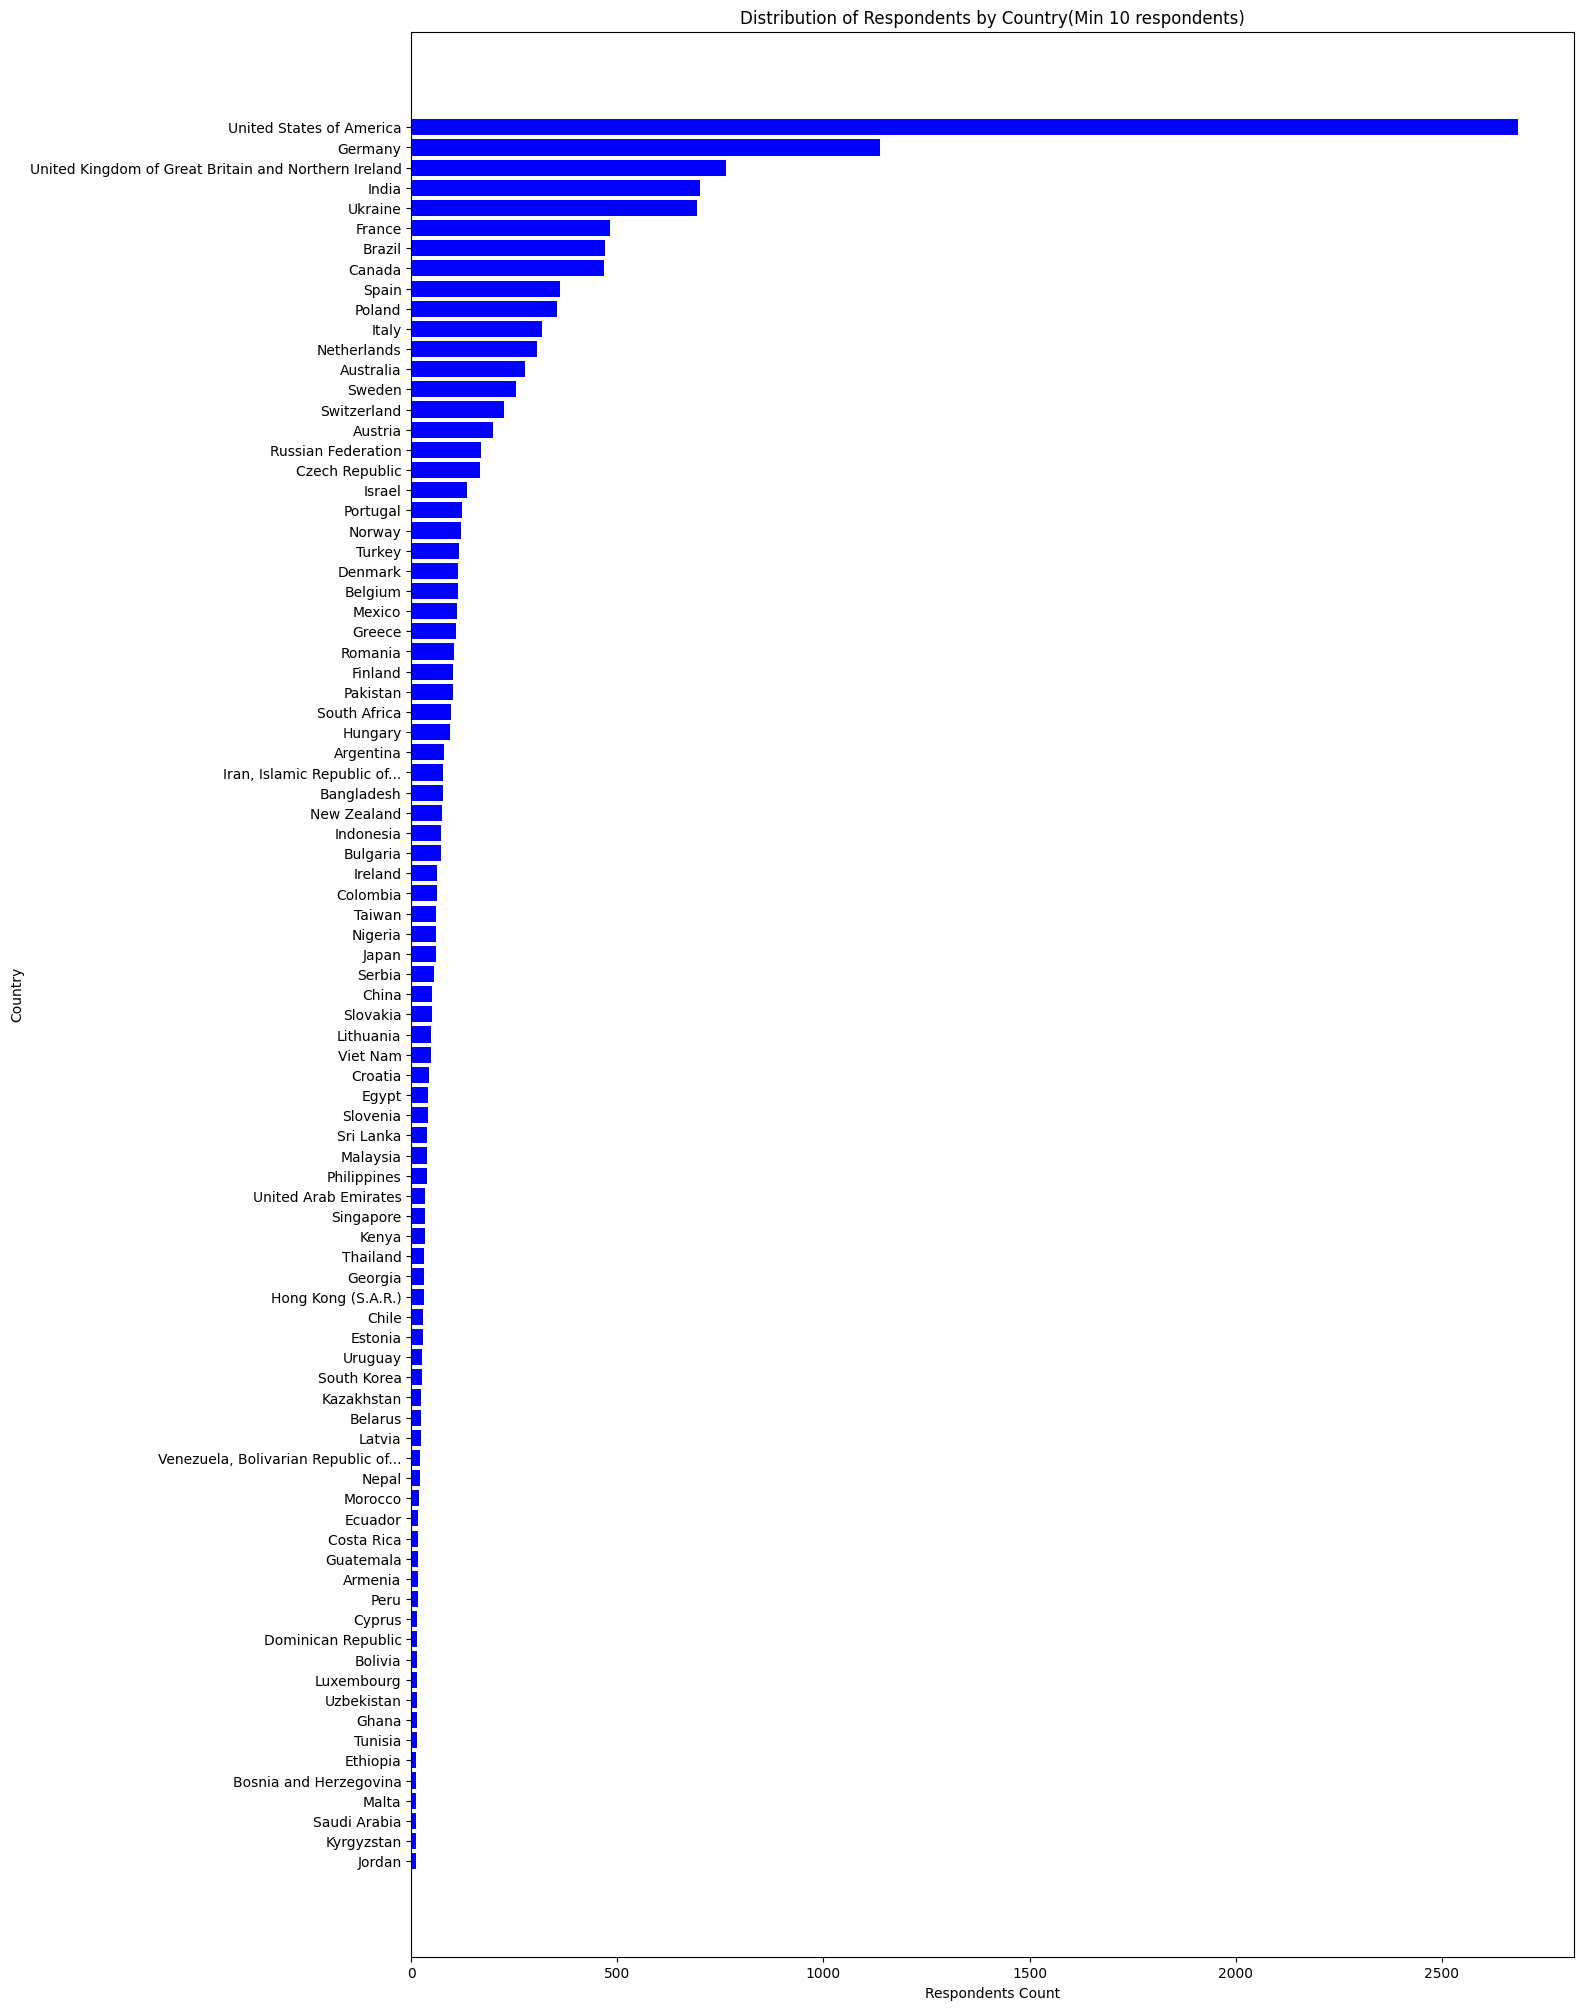

In [13]:
## Write your code here
df=df.dropna(subset = ['Country'])

dist =df['Country'].value_counts().reset_index(name='Count')
countries = dist[dist['Count'] > 10].sort_values(by= 'Count', ascending=True)

plt.figure(figsize=(15,25))
plt.barh(countries['Country'], countries['Count'], color='b')
plt.title('Distribution of Respondents by Country(Min 10 respondents)')
plt.xlabel('Respondents Count')
plt.ylabel('Country')
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
